In [3]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
from IPython.display import Image
import os

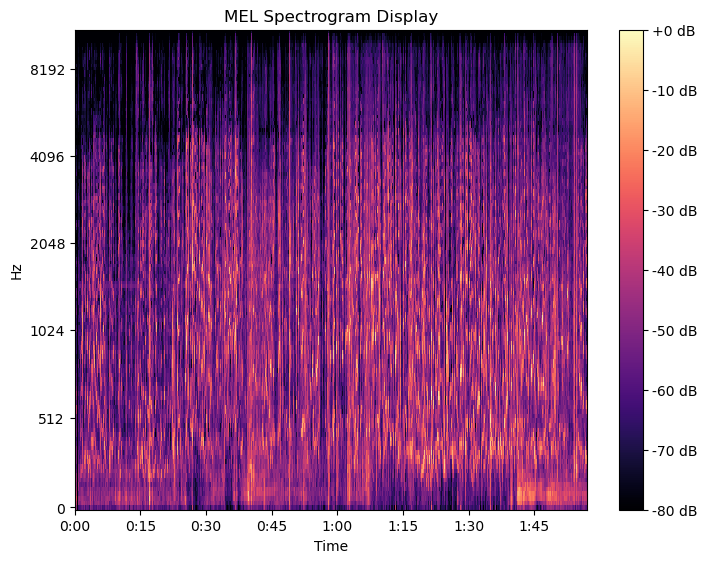

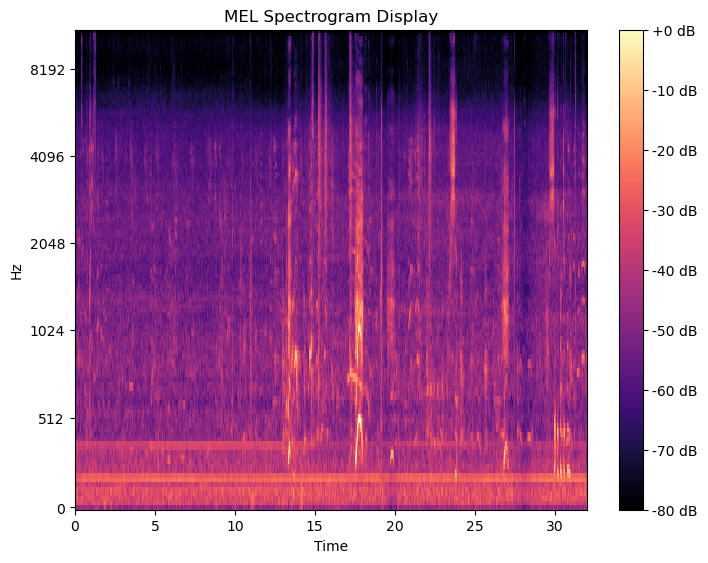

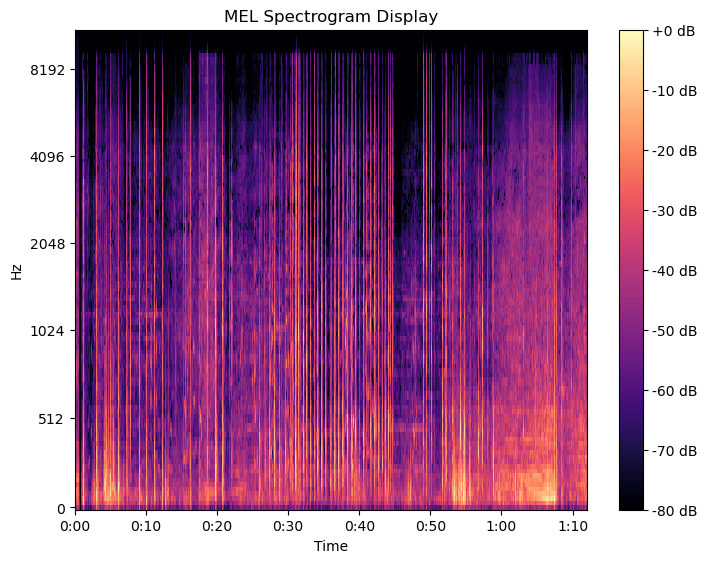

In [12]:
# display the MEL spectrogram given an audio file
def display_mel_spectrogram(audio_file):
    # plot the spectogram canvas in matplotlib
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    # load the audio file using librosa, and genereate the MEL spectrogram from the audio file
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # re-scale the output to db (loudness unit measure) and plot the spectrogram
    log_ms = librosa.power_to_db(ms, ref=np.max)    
    img = librosa.display.specshow(log_ms, sr=sr, y_axis='mel', x_axis='time', ax=ax)
    
    # set the title and color bar
    ax.set(title='MEL Spectrogram Display')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    
display_mel_spectrogram('../../data/audios_VSD/angry_011.wav')
display_mel_spectrogram('../../data/audios_VSD/angry_012.wav')
display_mel_spectrogram('../../data/audios_VSD/angry_013.wav')

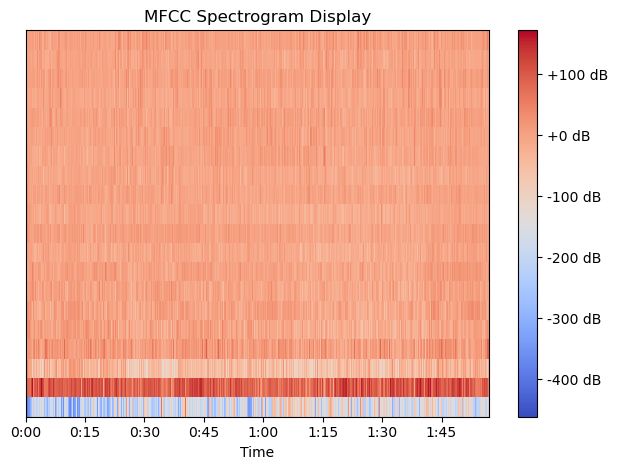

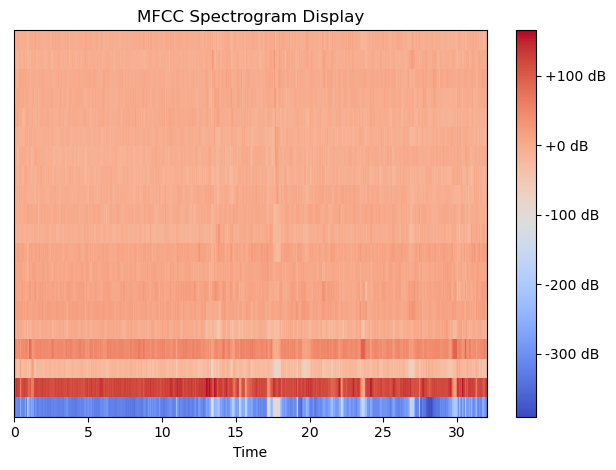

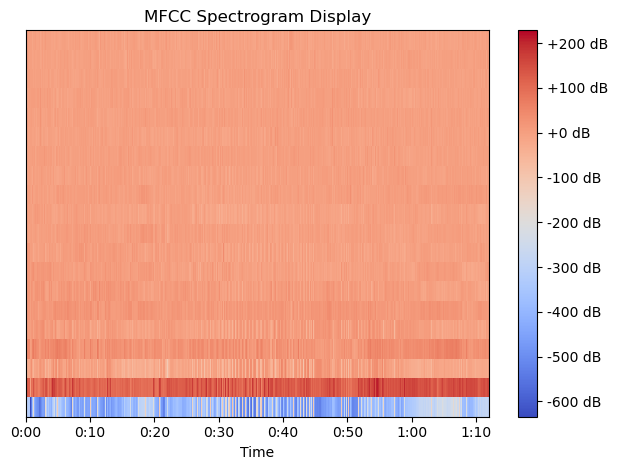

In [32]:
# display the MFCC (Mel Frequency Cepstrum Coefficient) spectrogram of a given audio file
def display_mfcc_spectrogram(audio_file):
    # plot the spectogram canvas in matplotlib
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # load the audio file using librosa, and genereate the MEL spectrogram from the audio file
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.mfcc(y=y, sr=sr)
    
    # plot the MFCC spectrogram
    img = librosa.display.specshow(ms, sr=sr, x_axis='time') # y_axis='mel', ax=ax,
    
    # set the title, color bar, and layout
    ax.set(title='MFCC Spectrogram Display')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.tight_layout()

display_mfcc_spectrogram('../../data/audios_VSD/angry_011.wav')
display_mfcc_spectrogram('../../data/audios_VSD/angry_012.wav')
display_mfcc_spectrogram('../../data/audios_VSD/angry_013.wav')

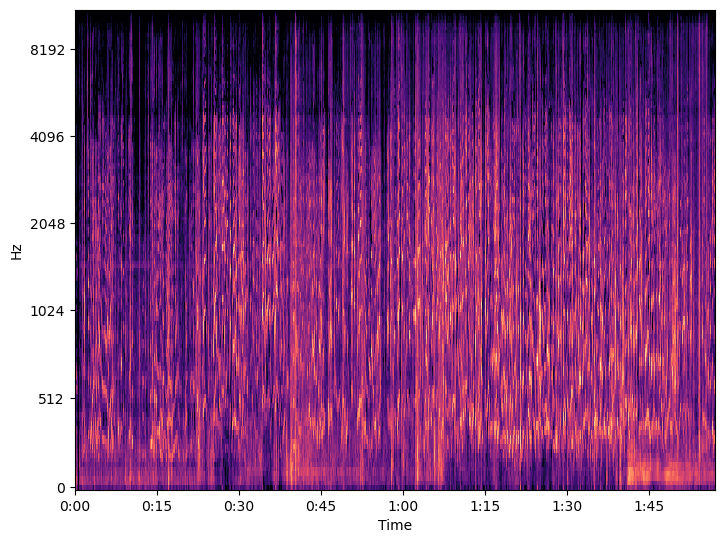

In [46]:
# read an audio file and save the MEL Spectrogram as a PNG image
def save_mel_spectrogram(audio_file, image_file):
    # plot the spectogram canvas in matplotlib
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    # load the audio file using librosa, and genereate the MEL spectrogram from the audio file
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # re-scale the output to db (loudness unit measure) and plot the spectrogram
    log_ms = librosa.power_to_db(ms, ref=np.max)    
    librosa.display.specshow(log_ms, sr=sr, y_axis='mel', x_axis='time', ax=ax)
    
    # save as a file
    fig.savefig(image_file)

save_mel_spectrogram('../../data/audios_VSD/angry_011.wav', 'angry_011.png')

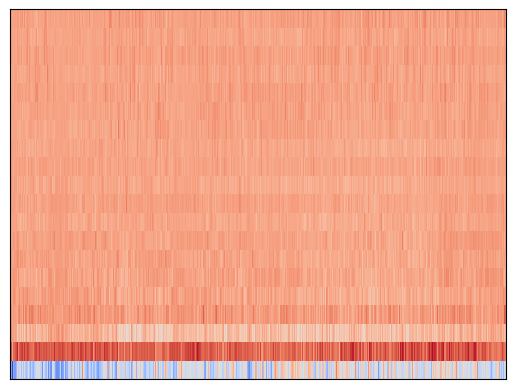

In [47]:
# read an audio file and save the MFCC Spectrogram as a PNG image
def save_mfcc_spectrogram(audio_file, image_file):
    # plot the spectogram canvas in matplotlib
    fig = plt.figure()
    
    # load the audio file using librosa, and genereate the MEL spectrogram from the audio file
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.mfcc(y=y, sr=sr)
    
    # plot the MFCC spectrogram
    img = librosa.display.specshow(ms, sr=sr) # y_axis='mel', ax=ax, x_axis='time'

    # save as a file
    fig.savefig(image_file)

save_mfcc_spectrogram('../../data/audios_VSD/angry_011.wav', 'angry_011.png')

In [52]:
# need to fix: frames of images saved, and stop displaying spectrograms when saving files

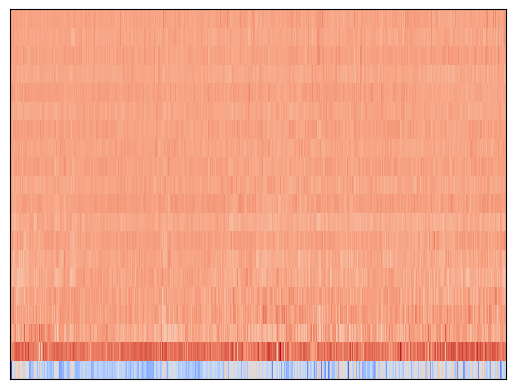

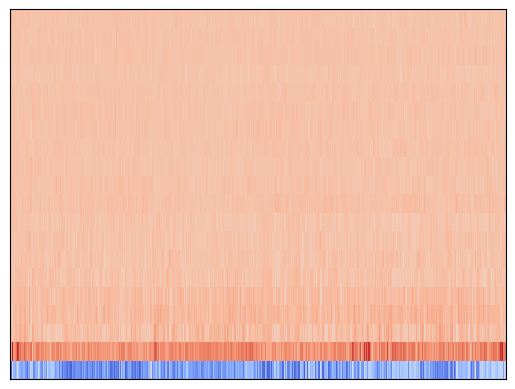

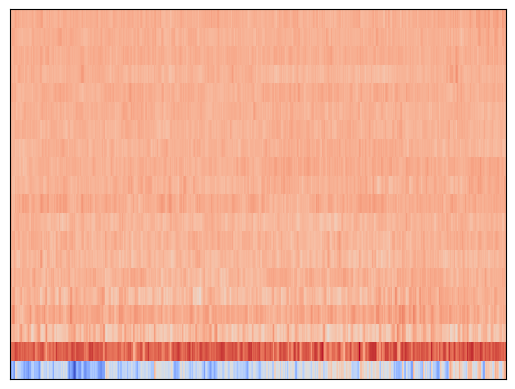

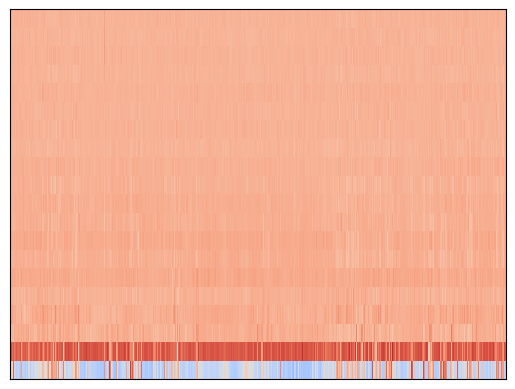

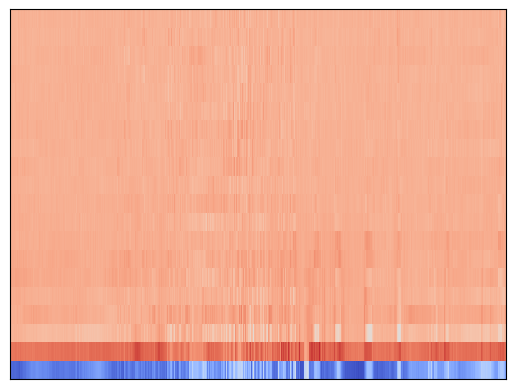

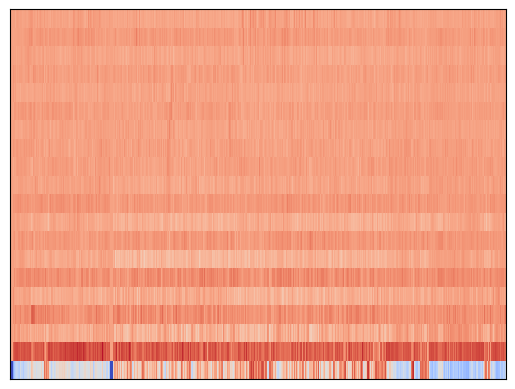

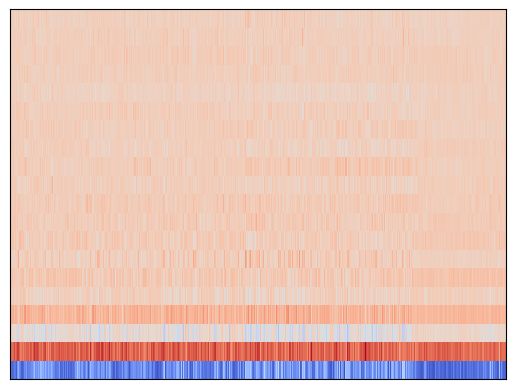

In [51]:
# read all audio files from a path and generate all MEL spectrograms into an output path    
def save_spectrograms(input_path, output_path, spectrogram='mel'):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        if spectrogram == 'mel':
            save_mel_spectrogram(input_file, output_file)
        elif spectrogram == 'mfcc':
            save_mfcc_spectrogram(input_file, output_file)

save_spectrograms('../../data/audios_VSD', '../../data/output', 'mfcc')